In [1]:
%load_ext autoreload
%autoreload 2
import pipeline
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pipe = pipeline.process()
df = pipe.load_data()

In [21]:
df.dtypes

year                            int64
name                          float64
parent-location                object
population                    float64
poverty-rate                  float64
renter-occupied-households    float64
pct-renter-occupied           float64
median-gross-rent             float64
median-household-income       float64
median-property-value         float64
rent-burden                   float64
pct-white                     float64
pct-af-am                     float64
pct-hispanic                  float64
pct-am-ind                    float64
pct-asian                     float64
pct-nh-pi                     float64
pct-multiple                  float64
pct-other                     float64
eviction-filings              float64
evictions                     float64
eviction-rate                 float64
eviction-filing-rate          float64
low-flag                        int64
imputed                         int64
subbed                          int64
dtype: objec

In [5]:
plot_var = df['eviction-rate']

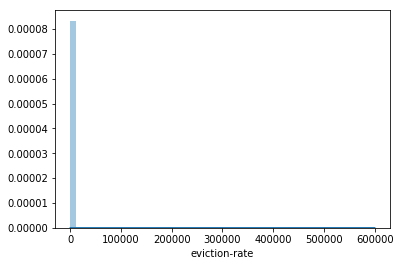

In [7]:
sns.distplot(plot_var[~plot_var.isnull()], kde = True, rug = False)

In [8]:
df['eviction-rate'].describe()

count     27889.000000
mean         57.509008
std        4422.867253
min           0.000000
25%           1.740000
50%           3.640000
75%           6.980000
max      600000.100000
Name: eviction-rate, dtype: float64

In [20]:
df[df['eviction-rate'] == 0].loc[:,['year', 'name','parent-location', 'population', 'evictions']]

,year,name,parent-location,population,evictions
136,2000,9801.00,"Accomack County, Virginia",7.00,0.0
137,2001,9801.00,"Accomack County, Virginia",7.00,0.0
138,2002,9801.00,"Accomack County, Virginia",7.00,0.0
139,2003,9801.00,"Accomack County, Virginia",7.00,0.0
140,2004,9801.00,"Accomack County, Virginia",7.00,0.0
141,2005,9801.00,"Accomack County, Virginia",6.97,0.0
142,2006,9801.00,"Accomack County, Virginia",6.97,0.0
143,2007,9801.00,"Accomack County, Virginia",6.97,0.0
144,2008,9801.00,"Accomack County, Virginia",6.97,0.0
145,2009,9801.00,"Accomack County, Virginia",6.97,0.0


[Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010')]

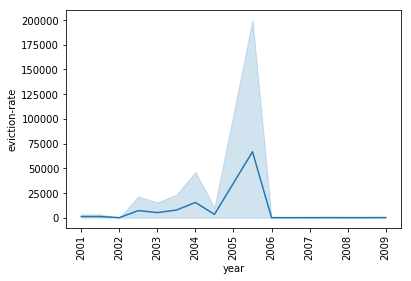

In [43]:
cond = {'name': 9801.00}
# df.loc[(df.name == cond['name']) & df['eviction-rate'], ['x','y']].plot()


# df.loc[(df.name == cond['name']) & (df.eviction-rate), ['x','y']].plot(title='name: {a}'.format(**cond))
tst = df[df['name'] == 9801.00]
ax = sns.lineplot(x=tst['year'], y=tst["eviction-rate"])
ax.set_xticklabels(tst['year'], rotation=90)

In [46]:
tst.columns

Index(['year', 'name', 'parent-location', 'population', 'poverty-rate',
       'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'low-flag', 'imputed', 'subbed'],
      dtype='object')

In [48]:
tst[tst['year']==2000]

,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
136,2000,9801.0,"Accomack County, Virginia",7.00,12.80,0.0,20.74,573.00,28514.00,105600.00,...,0.00,1.16,0.19,0.0,0.0,0.00,0.00,0,0,0
1887,2000,9801.0,"Arlington County, Virginia",0.17,7.88,0.0,66.90,1028.00,61809.00,496900.00,...,0.02,3.25,0.38,NaN,NaN,NaN,NaN,0,0,0
5038,2000,9801.0,"Dinwiddie County, Virginia",1.00,11.23,0.0,20.40,451.00,39731.00,77200.00,...,0.02,0.47,0.02,NaN,NaN,NaN,NaN,0,0,0
9441,2000,9801.0,"Fairfax County, Virginia",0.03,5.06,0.0,31.94,1005.00,72847.00,174100.00,...,0.14,5.04,0.00,NaN,NaN,NaN,NaN,0,0,0
12399,2000,9801.0,"Henrico County, Virginia",0.42,5.40,0.0,16.81,691.00,41958.00,78000.00,...,0.03,1.29,0.00,4.0,1.0,10000.00,40000.00,0,0,0
14439,2000,9801.0,"Loudoun County, Virginia",37.87,1.41,8.0,12.76,903.00,83390.00,243900.00,...,0.03,1.59,0.14,NaN,NaN,NaN,NaN,0,0,0
15493,2000,9801.0,"Nottoway County, Virginia",14.00,22.28,7.0,32.45,437.00,29491.00,71000.00,...,0.00,0.64,0.13,1.0,1.0,14.29,14.29,0,0,0
17703,2000,9801.0,"Prince William County, Virginia",0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0,0,0
17856,2000,9801.0,"Pulaski County, Virginia",0.17,11.73,0.0,22.46,385.00,35146.00,78000.00,...,0.00,0.88,0.02,0.0,0.0,0.00,0.00,0,0,0
23534,2000,9801.0,"Danville city, Virginia",79.38,16.54,13.0,35.57,462.00,27588.00,55100.00,...,0.04,0.99,0.04,0.0,0.0,0.00,0.00,0,0,0


In [49]:
df['name'].value_counts()

9801.00    221
102.00     204
9301.00    204
103.00     187
301.00     170
9901.00    170
203.00     170
101.00     170
9302.00    153
9303.00    153
1.00       153
202.00     153
303.00     136
302.00     136
402.00     136
305.00     136
5.00       119
204.00     119
205.00     119
3.00       119
207.00     119
4.00       119
107.00     119
401.00     119
201.00     119
206.00     102
109.00     102
105.00     102
306.00     102
110.00     102
          ... 
438.00      17
462.23      17
109.02      17
758.03      17
9002.02     17
8101.00     17
1021.00     17
803.04      17
4518.00     17
9004.08     17
4513.00     17
4525.01     17
404.01      17
4509.00     17
306.02      17
752.02      17
208.04      17
9019.00     17
4510.00     17
1010.03     17
4605.02     17
1009.12     17
4511.00     17
1012.00     17
41.00       17
35.00       17
608.00      17
464.00      17
462.25      17
4302.01     17
Name: name, Length: 1418, dtype: int64